In [553]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer,precision_score,recall_score,accuracy_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# DATA EXPLORATION

### Attribute Information

###### •	Diagnosis (M=malignant, B=benign)
###### •	ID number
###### •	Name
###### •	Radius (mean of distances from center to points on the perimeter)
###### •	Texture (standard deviation of gray-scale values)
###### •	Perimeter
###### •	Area
###### •	Smoothness (local variation in radius lengths)
###### •	Compactness (perimeter^2 / area - 1.0)
###### •	Concavity (severity of concave portions of the contour)
###### •	Symmetry
###### •	Fractal dimension ("coastline approximation" - 1)
###### •	Age

### Data Set Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

In this dataset, the targets are the malignent (1) and benign cells (0). For this project, my purpose is to build a model with high sensivity which will truely classify the malignant cells. So the model should not predict a malignant cell as benign which will cause serious problems in real life human health. 

So lets begin with observing the dataset

In [392]:
#Loading the dataset
df=pd.read_csv("breastcancer.csv",na_values=['NA','?',' ','  ']) 

In [393]:
df.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [394]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             498 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [395]:
#Statistical mesausers on each column
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
count,498.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.326635,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798,39.467487,0.372583
std,3.506881,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.027414,0.007060,13.604683,0.483918
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960,16.000000,0.000000
25%,11.817500,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700,27.000000,0.000000
50%,13.465000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540,40.000000,0.000000
75%,16.155000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120,52.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440,62.000000,1.000000


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

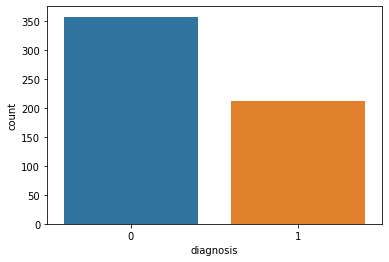

In [396]:
#Distribution of the target values

sns.countplot(data=df,x=df["diagnosis"])

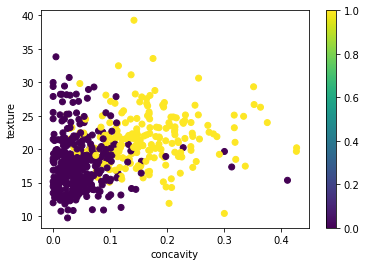

In [398]:
#Target points for two features

plt.scatter(df['concavity'], df['texture'], c=df['diagnosis'])
plt.xlabel('concavity')
plt.ylabel('texture')
plt.colorbar()
plt.show()

In [399]:
# Dropping nominal columns

df=df.drop(columns=["id", "name"])

In [400]:
#Filling nan values in radius with the median values

df=df.fillna(df.median())

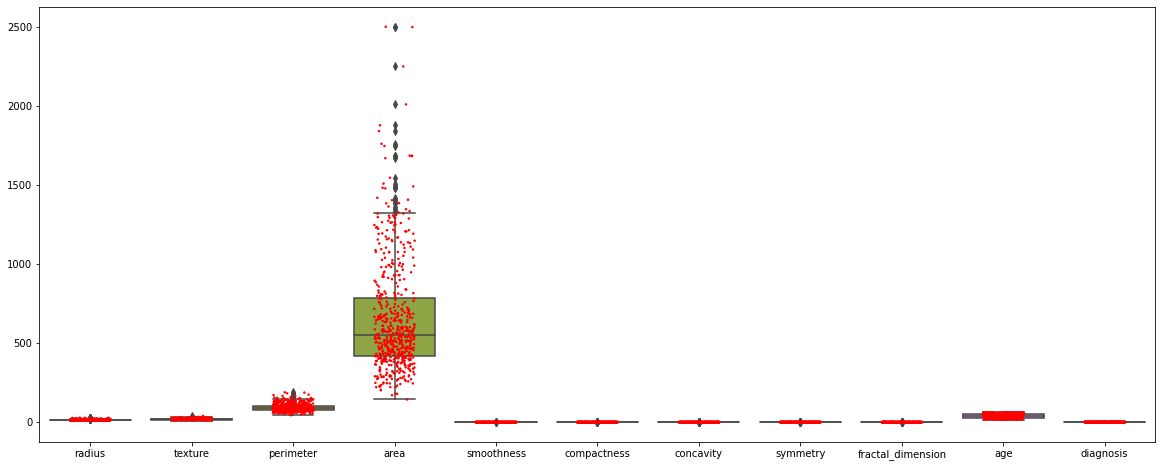

In [401]:
#Drawing boxplot for distribusion of data  

plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df)
ax = sns.stripplot( data=df, color="red", jitter=0.2, size=2.5)
plt.show()

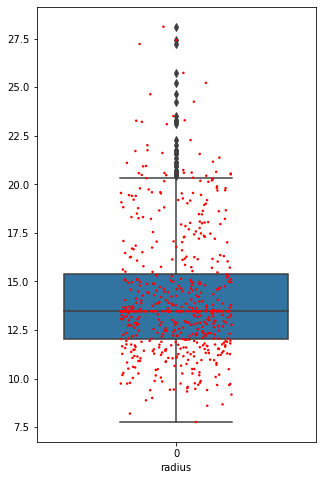

In [403]:
#closer look for the features radius,perimeter and area

plt.figure(figsize=(5,8))
ax = sns.boxplot( data=df['radius']).set(
    xlabel='radius'
)
ax = sns.stripplot( data=df['radius'], color="red", jitter=0.2, size=2.5)
plt.show()


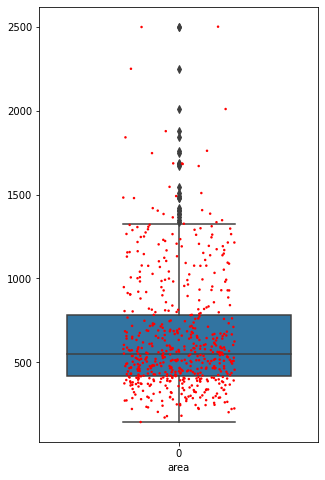

In [404]:
plt.figure(figsize=(5,8))
ax = sns.boxplot( data=df['area']).set(
    xlabel='area'
)
ax = sns.stripplot( data=df['area'], color="red", jitter=0.2, size=2.5)
plt.show()

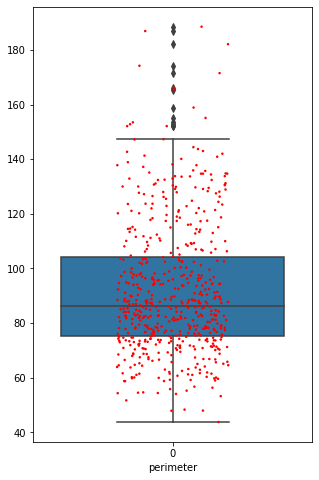

In [405]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(data=df['perimeter']).set(
    xlabel='perimeter'
)
ax = sns.stripplot( data=df['perimeter'], color="red", jitter=0.2, size=2.5)
plt.show()

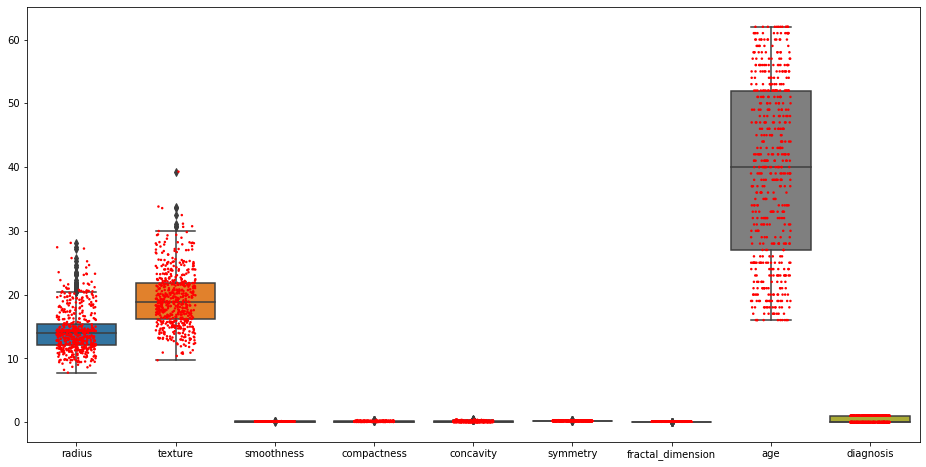

In [114]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df.drop(columns=['area','perimeter']))
ax = sns.stripplot( data=df.drop(columns=['area','perimeter']), color="red", jitter=0.2, size=2.5)
plt.show()

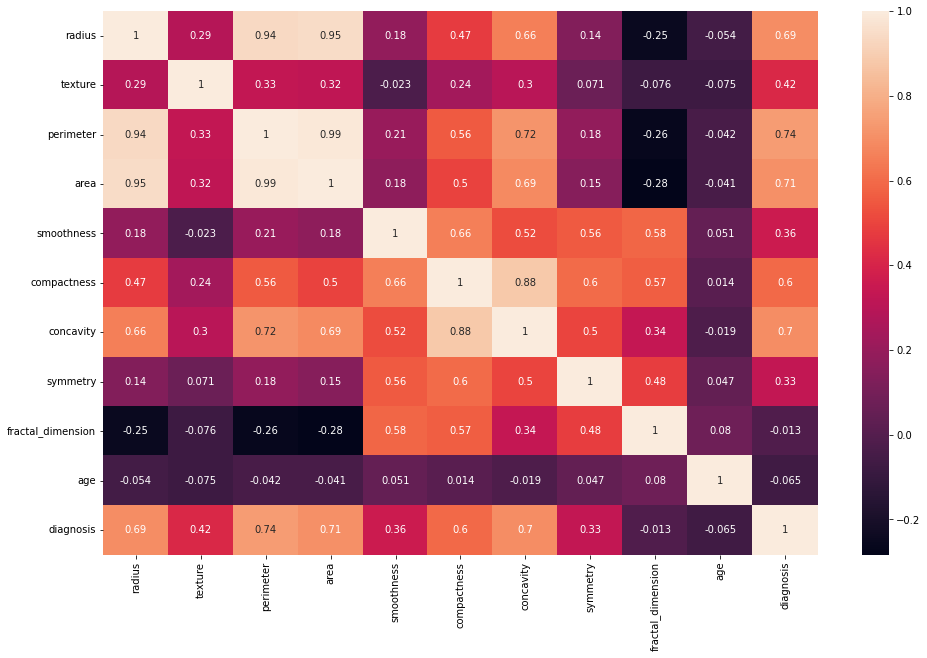

In [406]:
#Correlation matrix for features' correlation with each other and the target value
plt.subplots(figsize=(16,10))
cm = sns.heatmap(df.corr(), annot = True)

cm.set()

plt.show()

# DATA PREPROCESSING

### Finding highly correlated features

In [407]:
#Measuring correlation between features 

X=df.drop(columns=["diagnosis"])

In [410]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [411]:
calculate_vif(df=X, features=X.columns)

,VIF,Tolerance
radius,10.017837,0.099822
texture,1.190895,0.839705
perimeter,74.641429,0.013397
area,59.975421,0.016673
smoothness,2.193053,0.455985
compactness,14.255611,0.070148
concavity,7.457616,0.134091
symmetry,1.759956,0.568196
fractal_dimension,6.519019,0.153397
age,1.018844,0.981505


In [412]:
#Dropping columns which have VIF>10

df=df.drop(columns=["perimeter","area","compactness"])

### Feature Selection

In [413]:
#Applying boruto feature selection function to select the features with best contribution to model

forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto'
)
X1=df.drop(columns="diagnosis")
y1=df["diagnosis"]
boruta.fit(np.array(X1), np.array(y1))
selected_features = X1.columns[boruta.support_].to_list()
selected_features.append("diagnosis") #adding target column to selected feature set
selected_features

['radius',
 'texture',
 'smoothness',
 'concavity',
 'symmetry',
 'fractal_dimension',
 'diagnosis']

In [414]:
#reconstruct the dataframe on selected features

selected_df=df[selected_features]

In [416]:
selected_df.head()

,radius,texture,smoothness,concavity,symmetry,fractal_dimension,diagnosis
0,13.465,10.38,0.11840,0.3001,0.2419,0.07871,1
1,20.570,17.77,0.08474,0.0869,0.1812,0.05667,1
2,19.690,21.25,0.10960,0.1974,0.2069,0.05999,1
3,13.465,20.38,0.14250,0.2414,0.2597,0.09744,1
4,20.290,14.34,0.10030,0.1980,0.1809,0.05883,1


### Normalization

In [417]:
#Normalizing radius and texture columns (other features are already in a range between 0 and 1)

normalized_df = MinMaxScaler().fit_transform(selected_df[["radius","texture"]])
selected_df[["radius","texture"]]=normalized_df
X_scaled=selected_df[selected_features]

In [418]:
X_scaled

,radius,texture,smoothness,concavity,symmetry,fractal_dimension,diagnosis
0,0.280344,0.022658,0.11840,0.30010,0.2419,0.07871,1
1,0.629484,0.272574,0.08474,0.08690,0.1812,0.05667,1
2,0.586241,0.390260,0.10960,0.19740,0.2069,0.05999,1
3,0.280344,0.360839,0.14250,0.24140,0.2597,0.09744,1
4,0.615725,0.156578,0.10030,0.19800,0.1809,0.05883,1
...,...,...,...,...,...,...,...
564,0.678133,0.428813,0.11100,0.24390,0.1726,0.05623,1
565,0.607862,0.626987,0.09780,0.14400,0.1752,0.05533,1
566,0.434398,0.621238,0.08455,0.09251,0.1590,0.05648,1
567,0.630958,0.663510,0.11780,0.35140,0.2397,0.07016,1


In [419]:
X_scaled.describe()

,radius,texture,smoothness,concavity,symmetry,fractal_dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.317401,0.323965,0.096360,0.088799,0.181162,0.062798,0.372583
std,0.161806,0.145453,0.014064,0.079720,0.027414,0.007060,0.483918
min,0.000000,0.000000,0.052630,0.000000,0.106000,0.049960,0.000000
25%,0.210811,0.218465,0.086370,0.029560,0.161900,0.057700,0.000000
50%,0.280344,0.308759,0.095870,0.061540,0.179200,0.061540,0.000000
75%,0.373956,0.408860,0.105300,0.130700,0.195700,0.066120,1.000000
max,1.000000,1.000000,0.163400,0.426800,0.304000,0.097440,1.000000


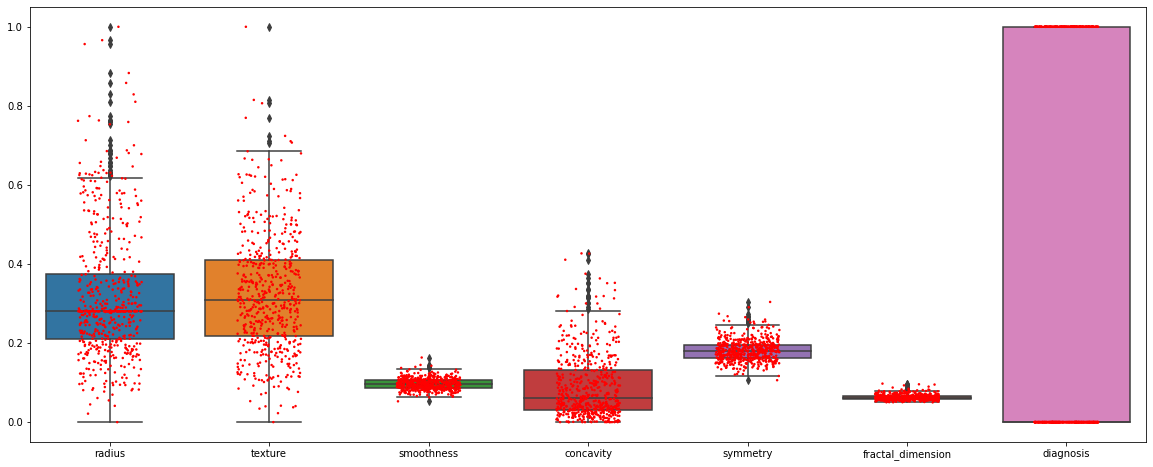

In [420]:
#Showing the data distribution of scaled dataframe 

plt.figure(figsize=(20,8))
ax = sns.boxplot(data=selected_df)
ax = sns.stripplot( data=selected_df, color="red", jitter=0.2, size=2.5)
plt.show()

### TEST&TRAIN SPLIT

In [554]:
#Train and test sets are seperated

X=X_scaled.drop(columns=["diagnosis"])
y=X_scaled[["diagnosis"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [474]:
shape_of_sets={'X_train: ': X_train.shape, 'X_valid: ': X_valid.shape, 'X_test: ': X_test.shape}
for key in shape_of_sets:
    print(f'Shape of {key} is {shape_of_sets[key]}')

Shape of X_train:  is (398, 6)
Shape of X_valid:  is (85, 6)
Shape of X_test:  is (86, 6)


# BUILDING&EVALUATING MODELS

### Random Forest Classifer

In [555]:
#Random forest classiffier model is built and fitted on training set

rf_clf=RandomForestClassifier(n_estimators=100,max_depth=50, bootstrap=True, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=42)

In [556]:
#Score for each metric is calculated

scores_rf={}

train_predicted_values_rf=rf_clf.predict(X_train)
test_predicted_values_rf=rf_clf.predict(X_test)
validation_predicted_values_rf=rf_clf.predict(X_valid)

scores_rf['Train accuracy']=accuracy_score(y_train,train_predicted_values_rf)
scores_rf['Test accuracy']=accuracy_score(y_test,test_predicted_values_rf)
scores_rf['Validation accuracy']=accuracy_score(y_valid,validation_predicted_values_rf)
scores_rf['Precision score']=precision_score(y_test,test_predicted_values_rf)
scores_rf['Recall score']=recall_score(y_test,test_predicted_values_rf)
scores_rf['F1 score']=f1_score(y_test,test_predicted_values_rf)

In [557]:
for key in scores_rf:
    print(f'{key} for random forest classifer model is {scores_rf[key]}')

Train accuracy for random forest classifer model is 0.9978021978021978
Test accuracy for random forest classifer model is 0.9824561403508771
Validation accuracy for random forest classifer model is 0.9764705882352941
Precision score for random forest classifer model is 1.0
Recall score for random forest classifer model is 0.9534883720930233
F1 score for random forest classifer model is 0.9761904761904763


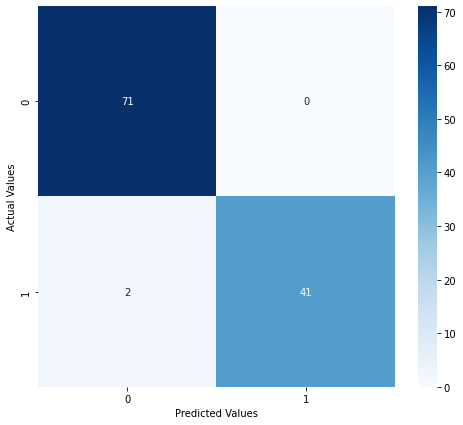

In [558]:
#Confusion matrix is plotted. As is seen, only 2 malignant celss are misclassiffied

cf_matrix_rf=confusion_matrix(y_test,test_predicted_values_rf)
plt.figure(figsize=(8,7))
rf_cf_plot=sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues')
rf_cf_plot.set_xlabel('Predicted Values')
rf_cf_plot.set_ylabel('Actual Values')
plt.show()

In [559]:
#True positive and false positive rates are calculated to draw ROC curve

fpr, tpr, _ = metrics.roc_curve(y_test,  test_predicted_values_rf)
auc_rf = metrics.roc_auc_score(y_test, test_predicted_values_rf)

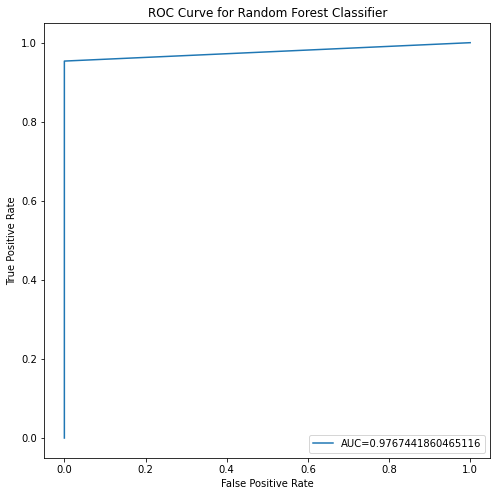

In [560]:
plt.figure(figsize=(8,8))
plt.title("ROC Curve for Random Forest Classifier")

plt.plot(fpr,tpr,label="AUC="+str(auc_rf))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [561]:
#Logistic regression classiffier model is built and fitted on training set

logreg = LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [562]:
#Score for each metric is calculated

scores_lr={}

train_predicted_values_lr=logreg.predict(X_train)
test_predicted_values_lr=logreg.predict(X_test)

scores_lr['Train accuracy']=accuracy_score(y_train,train_predicted_values_lr)
scores_lr['Test accuracy']=accuracy_score(y_test,test_predicted_values_lr)
scores_lr['Precision score']=precision_score(y_test,test_predicted_values_lr)
scores_lr['Recall score']=recall_score(y_test,test_predicted_values_lr)
scores_lr['F1 score']=f1_score(y_test,test_predicted_values_lr)

In [563]:
for key in scores_lr:
    print(f'{key} for logistic regression model is {scores_lr[key]}')

Train accuracy for logistic regression model is 0.9142857142857143
Test accuracy for logistic regression model is 0.9649122807017544
Precision score for logistic regression model is 0.975609756097561
Recall score for logistic regression model is 0.9302325581395349
F1 score for logistic regression model is 0.9523809523809524


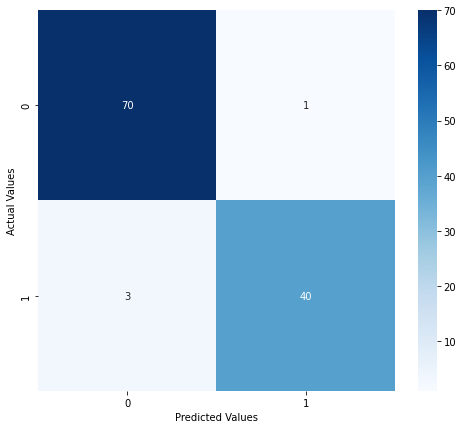

In [564]:
#Confusion matrix is plotted. As is seen, only 2 malignant celss are misclassiffied

cf_matrix_lr=confusion_matrix(y_test,test_predicted_values_lr)
plt.figure(figsize=(8,7))
lr_cf_plot=sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues')
lr_cf_plot.set_xlabel('Predicted Values')
lr_cf_plot.set_ylabel('Actual Values')
plt.show()

In [565]:
#True positive and false positive rates are calculated to draw ROC curve

fpr, tpr, _ = metrics.roc_curve(y_test,  test_predicted_values_lr)
auc_lr = metrics.roc_auc_score(y_test, test_predicted_values_lr)

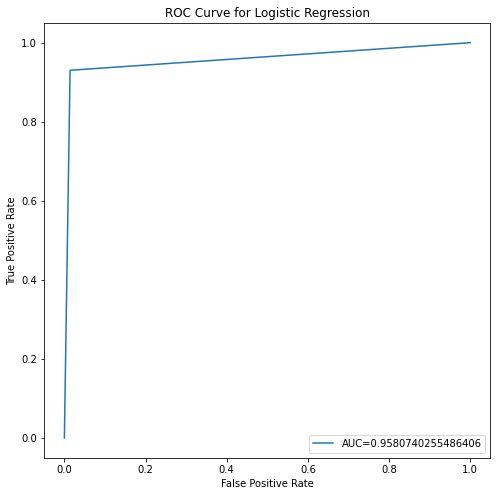

In [566]:
plt.figure(figsize=(8,8))
plt.title("ROC Curve for Logistic Regression")

plt.plot(fpr,tpr,label="AUC="+str(auc_lr))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### SVM Classifier

In [568]:
#SVM classiffier model is built and fitted on training set

svm_clf = svm.SVC(kernel='linear',random_state=42, C=2.0)
svm_clf.fit(X_train, y_train)

SVC(C=2.0, kernel='linear', random_state=42)

In [569]:
#Score for each metric is calculated

scores_svc={}

train_predicted_values_svc=svm_clf.predict(X_train)
test_predicted_values_svc=svm_clf.predict(X_test)

scores_svc['Train accuracy']=accuracy_score(y_train,train_predicted_values_svc)
scores_svc['Test accuracy']=accuracy_score(y_test,test_predicted_values_svc)
scores_svc['Precision score']=precision_score(y_test,test_predicted_values_svc)
scores_svc['Recall score']=recall_score(y_test,test_predicted_values_svc)
scores_svc['F1 score']=f1_score(y_test,test_predicted_values_svc)

In [570]:
for key in scores_svc:
    print(f'{key} for svm classifer is {scores_svc[key]}')

Train accuracy for svm classifer is 0.9164835164835164
Test accuracy for svm classifer is 0.956140350877193
Precision score for svm classifer is 0.975
Recall score for svm classifer is 0.9069767441860465
F1 score for svm classifer is 0.9397590361445783


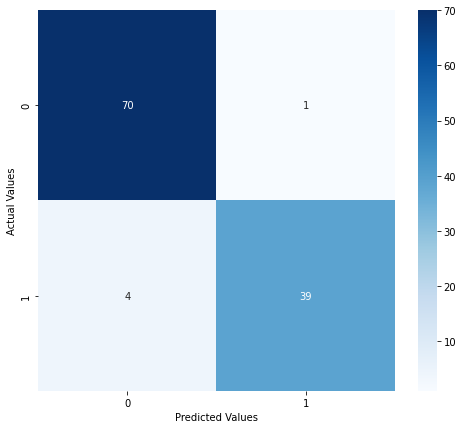

In [571]:
#Confusion matrix is plotted. As is seen, only 2 malignant celss are misclassiffied

cf_matrix_svc=confusion_matrix(y_test,test_predicted_values_svc)
plt.figure(figsize=(8,7))
svc_cf_plot=sns.heatmap(cf_matrix_svc, annot=True, cmap='Blues')
svc_cf_plot.set_xlabel('Predicted Values')
svc_cf_plot.set_ylabel('Actual Values')
plt.show()

In [572]:
#True positive and false positive rates are calculated to draw ROC curve

fpr, tpr, _ = metrics.roc_curve(y_test,  test_predicted_values_svc)
auc_svc = metrics.roc_auc_score(y_test, test_predicted_values_svc)

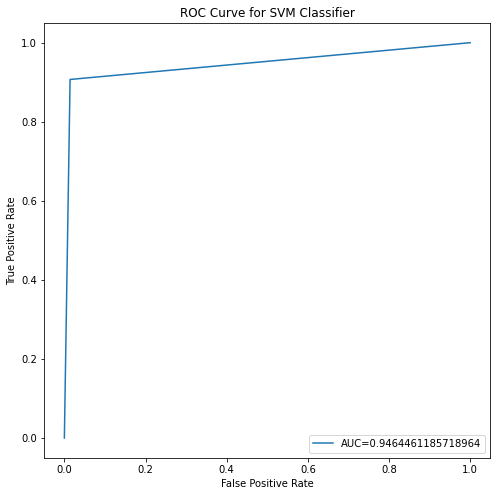

In [573]:
plt.figure(figsize=(8,8))
plt.title("ROC Curve for SVM Classifier")

plt.plot(fpr,tpr,label="AUC="+str(auc_svc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [574]:
Model_labels=["SVC","Logistic Regression","Random Forest"]
Recall_values=[recall_score(y_test,test_predicted_values_svc),recall_score(y_test,test_predicted_values_lr),recall_score(y_test,test_predicted_values_rf)]

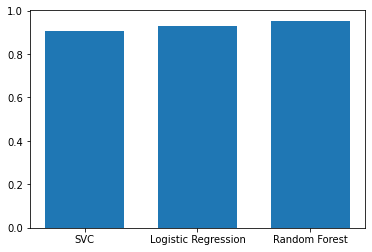

In [576]:
plt.bar(Model_labels,Recall_values, width=0.7)
plt.show()

# Conclusion

The most important metric for classification of breast cancer was recall. Since classifiying a cell as benign where it’s actually malignant is not acceptaple when it comes to human life.
Comparison of model performance evaluations are below. As is seen most accurate model so far is Random Forest Classifier, not surprisingly.
